In [16]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import murenn
import torch
import math
import numpy as np

In [17]:
N = 2**10
x = torch.zeros(1, 1, N)
x[0, 0, N//2] = 1
J = 9

dtcwt = murenn.DTCWT(J=J, alternate_gh=True)
idtcwt = murenn.DTCWTInverse(J=J, alternate_gh=True)

x_phi, x_psis = dtcwt(x)
y_j = []

for j in range(J):
    y_phi = x_phi * 0
    y_psis = [x_psis[k] * (j==k) for k in range(J)]
    y_j.append(idtcwt(y_phi, y_psis).squeeze())

lp_psis = [torch.zeros(x_psis[k].shape)*(1+1j) for k in range(J)]
y_lp = idtcwt(x_phi, lp_psis).squeeze()

Text(0.5, 1.0, 'Impulse responses')

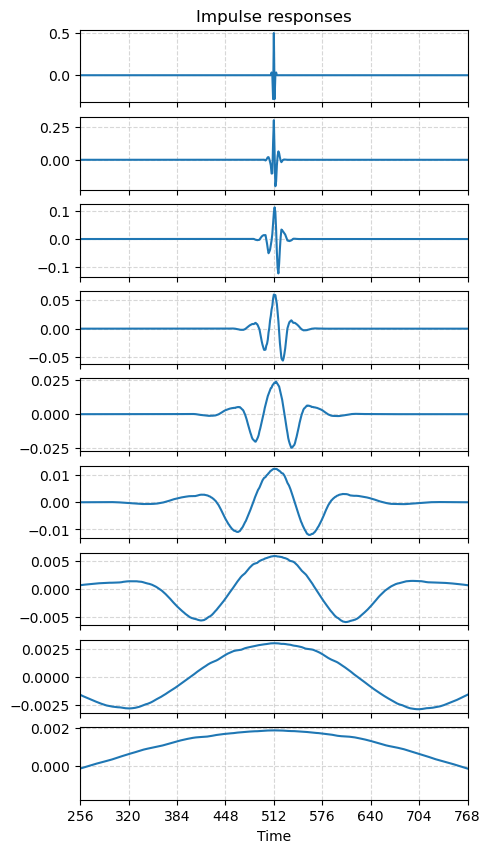

In [18]:
fig, axes = plt.subplots(J, 1, figsize=(5, 10), sharex=True)
for j, ax in enumerate(axes):
    ax.plot(torch.real(y_j[j]).numpy(), label=f'j={j}')
    ax.grid(linestyle='--', alpha=0.5)
plt.xticks(range(0, 1+N, N//16))
plt.xlim(N//4, 3*N//4)
plt.xlabel('Time')
axes[0].set_title('Impulse responses')

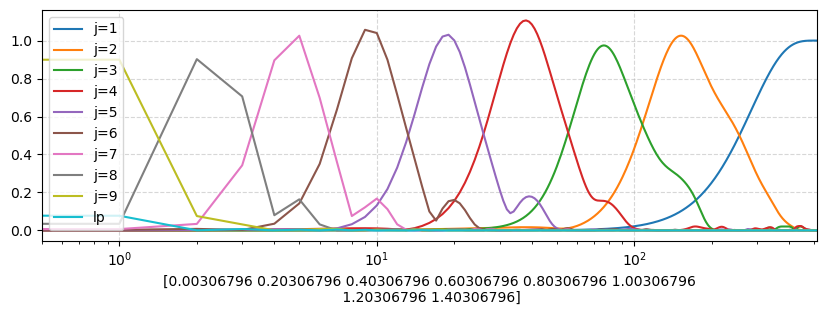

In [19]:
plt.figure(figsize=(10, 3))
for j in range(J):
    y_jhat = torch.fft.fft(y_j[j])
    plt.semilogx(range(N), torch.abs(y_jhat), label=f'j={j+1}')
y_lphat = torch.fft.fft(y_lp)
plt.semilogx(range(N), torch.abs(y_lphat), label=f'lp')
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(0.5, N//2)
plt.xlabel(np.arange(1/N * np.pi, np.pi/2, step=0.2))
# plt.title('Frequency responses')
plt.legend()